# Step 1.  Estimated population data will be assessed by analysing 2 files:
•	Number of Estimated Population for per regions and country for years 1995 – 2017

•	Number of Estimated Population per all regions and country for years 2011 – 2023

# First file
PEA04.csv - Estimated Population Number for years from 1995 – 2017

In [3]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [4]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Creating a DataFrame from file with Estimated Population statistic and displaing random rows
df_pop1 = pd.read_csv("PEA07.csv")
df_pop1.sample(8)

,Statistic Label,Age Group,Sex,Regional Authority Area,Year,UNIT,VALUE
2869,Estimated Population (Persons in April),20 - 24 years,Female,Dublin,2005,Thousand,59.0
4888,Estimated Population (Persons in April),40 - 44 years,Both sexes,Mid-West,2000,Thousand,22.5
8284,Estimated Population (Persons in April),65 - 69 years,Female,South-East,2008,Thousand,8.9
9224,Estimated Population (Persons in April),75 - 79 years,Male,Mid-East,2002,Thousand,2.8
10909,Estimated Population (Persons in April),All ages,Male,State,2015,Thousand,2317.7
1075,Estimated Population (Persons in April),5 - 9 years,Female,West,2015,Thousand,15.9
3831,Estimated Population (Persons in April),30 - 34 years,Male,West,1999,Thousand,11.7
10048,Estimated Population (Persons in April),80 - 84 years,Female,Mid-West,2012,Thousand,3.6


**Observation**

1. We have divission of all population by sex and ages. This divission is irrelevant for current project. As a result only aggregated data will be used.

2. "Statistic label" value can be used as a name for "VALUE" column, this will be be more readable and informative in future

3. Values from "VALUE" column can be multiplied by 1000. This will give us number of estimated population and column "UNIT" can be deprecated.

In [6]:
#Explore information about the DataFrame, i.e. nr of rows, nr of not null values, data types for columns, etc...
df_pop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11286 entries, 0 to 11285
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          11286 non-null  object 
 1   Age Group                11286 non-null  object 
 2   Sex                      11286 non-null  object 
 3   Regional Authority Area  11286 non-null  object 
 4   Year                     11286 non-null  int64  
 5   UNIT                     11286 non-null  object 
 6   VALUE                    11286 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 617.3+ KB


In [7]:
#removing rows that reflect data splitted by sex and leaving only data related to both sexes. 

df_pop1 = df_pop1.drop(df_pop1[(df_pop1["Sex"] != "Both sexes")].index)

#Checking and comparing nr of rows

df_pop1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3762 entries, 0 to 10889
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          3762 non-null   object 
 1   Age Group                3762 non-null   object 
 2   Sex                      3762 non-null   object 
 3   Regional Authority Area  3762 non-null   object 
 4   Year                     3762 non-null   int64  
 5   UNIT                     3762 non-null   object 
 6   VALUE                    3762 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 235.1+ KB


In [9]:
# Renaming columns for better and easier readability
df_pop1 = df_pop1.rename(columns={'VALUE': 'Estimated Population nr','Regional Authority Area': 'Region'})

In [12]:
# Checking region list
df_pop1.Region.unique()

array(['State', 'Border', 'Midland', 'West', 'Dublin', 'Mid-East',
       'Mid-West', 'South-East', 'South-West'], dtype=object)

In [13]:
# In column 'Region' replacing value 'State' with 'Ireland' and 'Midland' with 'Midlands'
df_pop1 = df_pop1.replace('State', 'Ireland')

In [14]:
df_pop1 = df_pop1.replace('Midland', 'Midlands')

In [43]:
#Multipliyng values by 1000
df_pop1['Estimated Population nr'] = df_pop1['Estimated Population nr'].mul(1000)

In [44]:
# Aggregating values by year and region
pop_agg1 = df_pop1.groupby(['Year', 'Region'])['Estimated Population nr'].sum()
pop_agg1 = pop_agg1.reset_index(drop=False)

# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_pop1 = pop_agg1.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df_pop1 = df_pop1.reset_index(drop=True)

#Displaying resulting data frame
df_pop1.head()

,Year,Region,Estimated Population nr
0,1996,Border,814500.0
1,1996,Dublin,2116500.0
2,1996,Ireland,7252000.0
3,1996,Mid-East,694800.0
4,1996,Mid-West,634200.0


Visualising Estimated population number per each region to see density

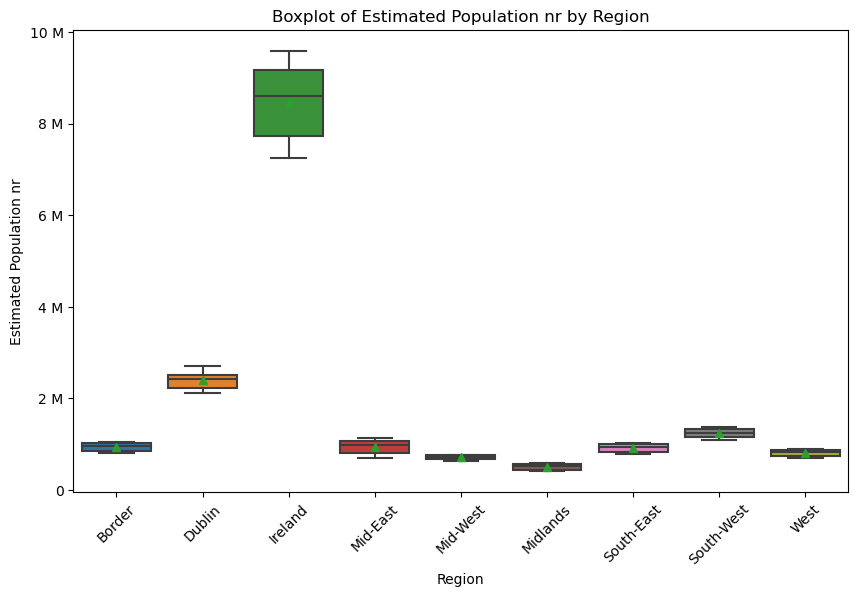

In [48]:
# Create the boxplot
plt.figure(figsize=(10, 6))  # Set the figure size to 10 inches wide and 6 inches tall
sns.boxplot(
    x = "Region",
    y = "Estimated Population nr",
    showmeans=True,
    data=df_pop1
)
# Add title and labels
plt.title("Boxplot of Estimated Population nr by Region")
plt.xlabel("Region")
plt.ylabel("Estimated Population nr")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format tickers in engineering format
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())

# Show the boxplot
plt.show()


**Observation**

Ireland and Dublin have data from higher range of numbers, which is logical.

##### Visualizing dynamic of population growrh in time.
Taking in consideration different data ranges from previous box plot, plotting Ireland and Dublin in separate plots.

In [50]:
#Dropping Ireland and Dublin 
df_reg = df_pop1.drop(df_pop1[(df_pop1["Region"] == "Ireland") | (df_pop1["Region"] == "Dublin")].index)

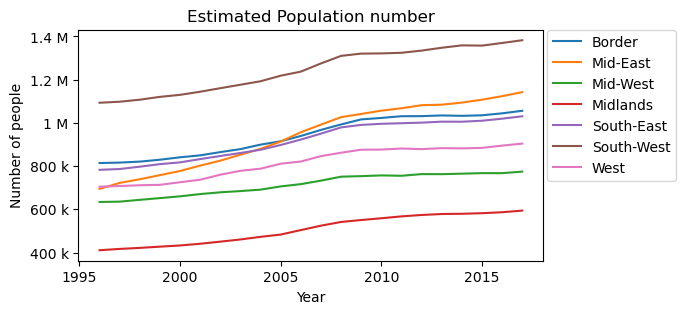

In [53]:
#Plotting dynamic of population growrh in time
plt.figure(figsize=(6, 3)) # setting figure size
for region in df_reg.Region.unique(): # creating a loop for regions
    df_region = df_reg[df_reg['Region'] == region]
    plt.gca().yaxis.set_major_formatter(ticker.EngFormatter()) # set ticker for big numbers
    plt.plot(df_region['Year'], df_region['Estimated Population nr'], label=region) # creating a plot with data for axes
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03)) # setting legend outfide of figure with plot for readability
    # Set title and axes name
    plt.title('Estimated Population number') 
    plt.xlabel("Year")
    plt.ylabel("Number of people")

In [54]:
#Creating same plot for Ireland and Dublin

In [55]:
df_filter = df_pop1.drop(df_pop1[(df_pop1["Region"] != "Ireland") & (df_pop1["Region"] != "Dublin")].index)

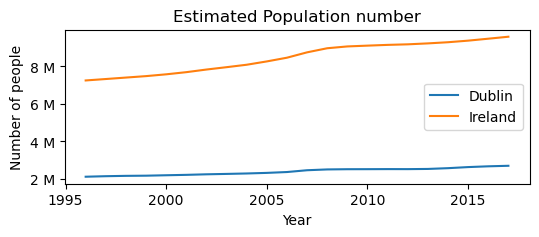

In [58]:
plt.figure(figsize=(6, 2))
for region in df_filter.Region.unique():
    df_region = df_filter[df_filter['Region'] == region]
    plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
    plt.plot(df_region['Year'], df_region['Estimated Population nr'], label=region)
    plt.legend(loc='right')
    plt.title('Estimated Population number')
    plt.xlabel("Year")
    plt.ylabel("Number of people")

# Second file
PEA04.csv - Estimated Population Number for years from 2011 – 2023

Performing same data manipulation as with 1st file

In [59]:
#Creating a DataFrame from file with Estimated Population statistic and displaing random rows
df_pop = pd.read_csv("PEA04.csv")
df_pop.sample(8)

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
1347,Estimated Population (Persons in April),2013,55 - 59 years,Female,Dublin,Thousand,33.2
4485,Estimated Population (Persons in April),2019,70 - 74 years,Both sexes,Mid-West,Thousand,21.0
4721,Estimated Population (Persons in April),2020,15 - 19 years,Female,South-West,Thousand,21.8
1685,Estimated Population (Persons in April),2014,25 - 29 years,Male,West,Thousand,12.2
2167,Estimated Population (Persons in April),2015,20 - 24 years,Both sexes,Mid-East,Thousand,35.3
2932,Estimated Population (Persons in April),2016,65 - 69 years,Male,Mid-East,Thousand,13.7
44,Estimated Population (Persons in April),2011,5 - 9 years,Male,Midland,Thousand,11.2
954,Estimated Population (Persons in April),2012,80 - 84 years,Male,State,Thousand,29.6


In [60]:
#Explore information about the DataFrame, i.e. nr of rows, nr of not null values, data types for columns, etc...
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB


In [61]:
#removing rows that reflect data splitted by sex and leaving only data related to both sexes. 

df_pop = df_pop.drop(df_pop[(df_pop["Sex"] != "Both sexes")].index)

#Checking and comparing nr of rows

df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2223 entries, 0 to 6650
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  2223 non-null   object 
 1   Year             2223 non-null   int64  
 2   Age Group        2223 non-null   object 
 3   Sex              2223 non-null   object 
 4   Region           2223 non-null   object 
 5   UNIT             2223 non-null   object 
 6   VALUE            2223 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 138.9+ KB


In [62]:
# In column 'Region' replacing value 'State' with 'Ireland' and 'Midland' with 'Midlands'
df_pop = df_pop.replace('State', 'Ireland')

In [63]:
df_pop = df_pop.replace('Midland', 'Midlands')

In [64]:
#Renaming last column with values
df_pop = df_pop.rename(columns={'VALUE': 'Estimated Population nr'})

In [65]:
#Multipliyng values by 1000
df_pop['Estimated Population nr'] = df_pop['Estimated Population nr'].mul(1000)

In [66]:
#Now we have 'Number' as a UNIT
df_pop = df_pop.replace('Thousand', 'Number')

In [67]:
#Checking region values
unique_region_names = df_pop.Region.unique()
unique_region_names

array(['Ireland', 'Border', 'West', 'Mid-West', 'South-East',
       'South-West', 'Dublin', 'Mid-East', 'Midlands'], dtype=object)

In [68]:
pop_agg = df_pop.groupby(['Year', 'Region'])['Estimated Population nr'].sum()

pop_agg.head()

Year  Region  
2011  Border       784000.0
      Dublin      2523000.0
      Ireland     9149700.0
      Mid-East    1314900.0
      Mid-West     933600.0
Name: Estimated Population nr, dtype: float64

In [69]:
pop_agg = pop_agg.reset_index(drop=False)
pop_agg.head()

,Year,Region,Estimated Population nr
0,2011,Border,784000.0
1,2011,Dublin,2523000.0
2,2011,Ireland,9149700.0
3,2011,Mid-East,1314900.0
4,2011,Mid-West,933600.0


In [70]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_pop = pop_agg.sort_values(by=['Year'], ascending=True)
# Reset the index of the DataFrame 'df_pop'
df_pop = df_pop.reset_index(drop=True)
df_pop.head()

,Year,Region,Estimated Population nr
0,2011,Border,784000.0
1,2011,Dublin,2523000.0
2,2011,Ireland,9149700.0
3,2011,Mid-East,1314900.0
4,2011,Mid-West,933600.0


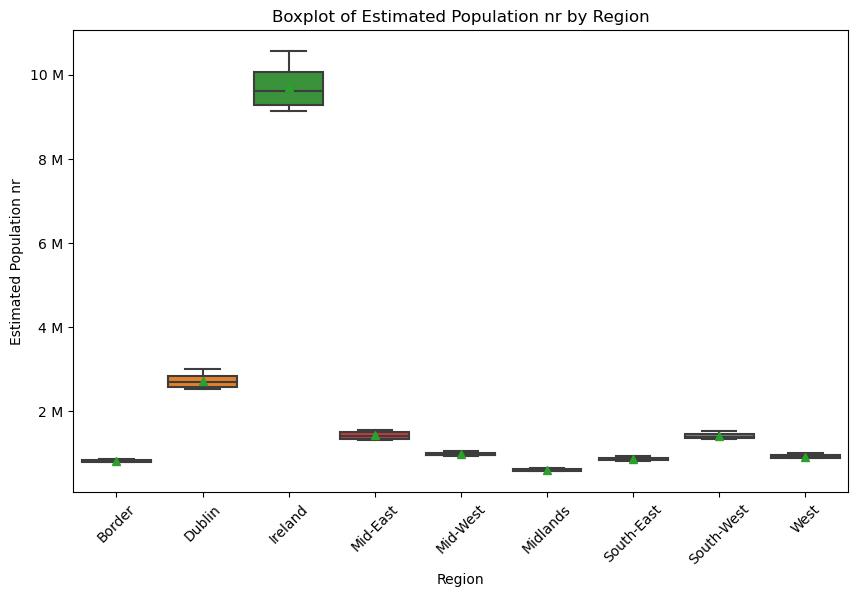

In [71]:
# Create the boxplot
plt.figure(figsize=(10, 6))  # Set the figure size to 10 inches wide and 6 inches tall
sns.boxplot(
    x = "Region",
    y = "Estimated Population nr",
    showmeans=True,
    data=df_pop
)
# Add title and labels
plt.title("Boxplot of Estimated Population nr by Region")
plt.xlabel("Region")
plt.ylabel("Estimated Population nr")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format tickers in engineering format
plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())

# Show the boxplot
plt.show()

In [72]:
df_reg = df_pop.drop(df_pop[(df_pop["Region"] == "Ireland") | (df_pop["Region"] == "Dublin")].index)

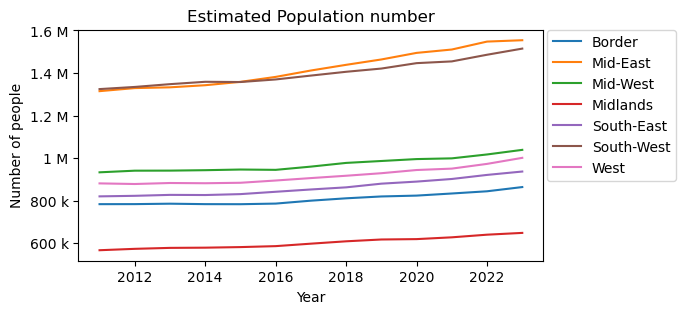

In [73]:
#Plotting dynamic of population growrh in time
plt.figure(figsize=(6, 3)) # setting figure size
for region in df_reg.Region.unique(): # creating a loop for regions
    df_region = df_reg[df_reg['Region'] == region]
    plt.gca().yaxis.set_major_formatter(ticker.EngFormatter()) # set ticker for big numbers
    plt.plot(df_region['Year'], df_region['Estimated Population nr'], label=region) # creating a plot with data for axes
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03)) # setting legend outfide of figure with plot for readability
    # Set title and axes name
    plt.title('Estimated Population number') 
    plt.xlabel("Year")
    plt.ylabel("Number of people")

In [74]:
df_filter = df_pop.drop(df_pop[(df_pop["Region"] != "Ireland") & (df_pop["Region"] != "Dublin")].index)

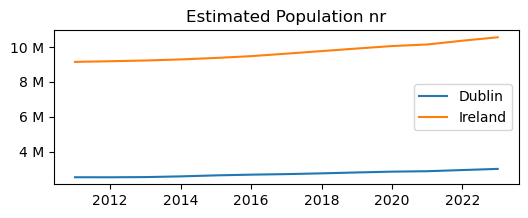

In [76]:
plt.figure(figsize=(6, 2))
for region in df_filter.Region.unique():
    df_region = df_filter[df_filter['Region'] == region]
    plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
    plt.plot(df_region['Year'], df_region['Estimated Population nr'], label=region)
    plt.legend(loc='right')
    plt.title('Estimated Population nr')

# Combining both data frames

In [78]:
df = pd.concat([df_pop, df_pop1], ignore_index=True)

In [79]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df = df.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df = df.reset_index(drop=True)

In [80]:
df.head()

,Year,Region,Estimated Population nr
0,1996,Mid-West,634200.0
1,1996,South-West,1093400.0
2,1996,South-East,783000.0
3,1996,Midlands,411000.0
4,1996,West,704900.0


In [81]:
# analyzing data for number of rows and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     315 non-null    int64  
 1   Region                   315 non-null    object 
 2   Estimated Population nr  315 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB


### Visualising resulting data frame

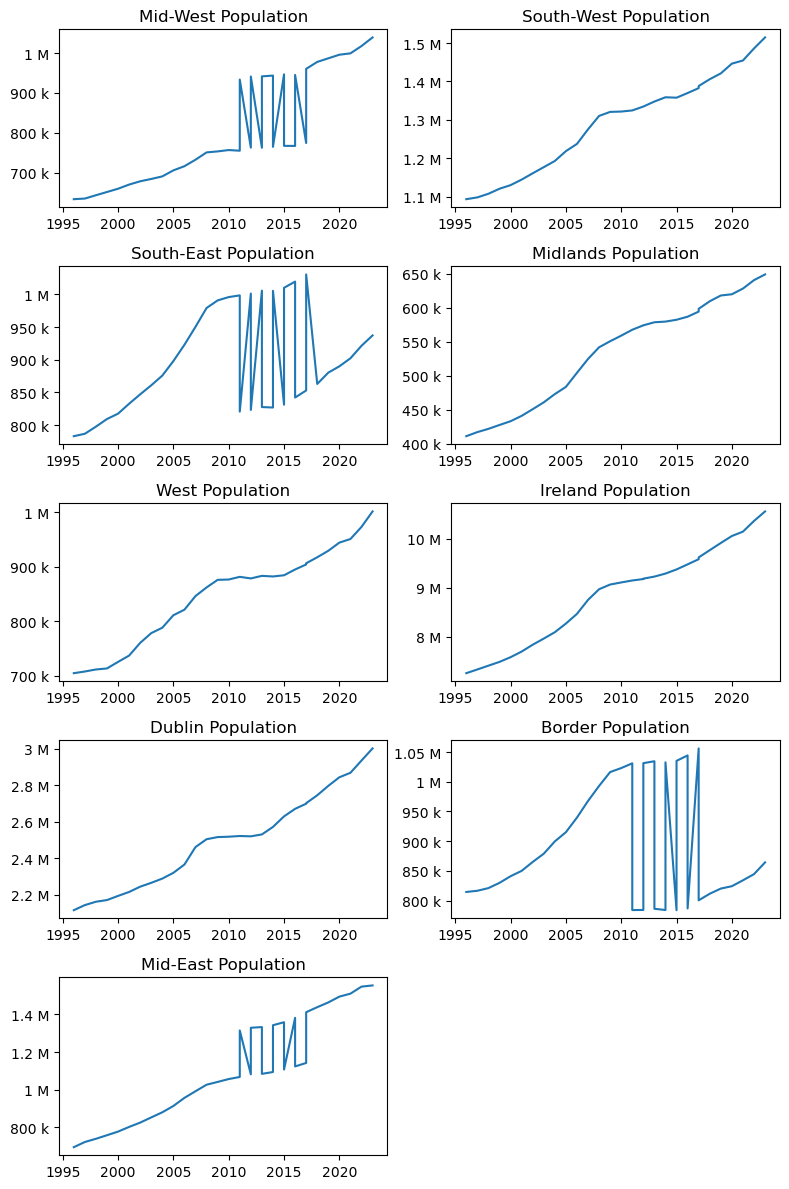

In [83]:
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker


# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(8, 12))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df[df['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['Estimated Population nr'], label=region)
    ax.set_title(f'{region} Population')

    # Set the Y axis scale to have readable format for numbers
    formatter = ticker.EngFormatter()
    ax.yaxis.set_major_formatter(formatter)
    
# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

**Observation**

4 regions have undulating plots in intersecting years. Deeper reserch discovered:
    county Lought was moved from Border to Mid-East region
    and South Tipperary was moved from Mid-West to South-East region

In [84]:
#Export DataFrame to a csv File
df.to_csv("PEA_c.csv", index = False)